## Refer the Dataquest Blog in case any queries
[click here](https://www.dataquest.io/blog/web-scraping-beautifulsoup/)

# Downloading web page and initialising data

In [1]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1')
content = response.content

soup = BeautifulSoup(content, 'html.parser')

movie_containers = soup.find_all('div', class_='lister-item mode-advanced')

# Extracting data for a single movie

In [6]:
logan = movie_containers[0]
first_name = logan.find('h3').find('a').text
first_year = logan.find('h3').find('span', class_='lister-item-year').text
first_imdb_rating = float(logan.find('strong').text)
first_metascore = int(logan.find('span',class_='metascore').text)
first_votes = int(logan.find('span',attrs={'name':'nv'})['data-value'])
desc = logan.find_all('p', class_='text-muted')[1].text

print(first_name, first_year, first_imdb_rating, first_metascore, first_votes, desc) 

Logan (2017) 8.1 77 537727 
    In a future where mutants are nearly extinct, an elderly and weary Logan leads a quiet life. But when Laura, a mutant child pursued by scientists, comes to him for help, he must get her to safety.


# Extracting Data For a single page

In [3]:
# List to score the scraped data
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extract data from individual movie container
for container in movie_containers:
    
    # If the movie has Metascore, then extract:
    if container.find('div', class_='ratings-metascore') is not None:
        
        #Extract name
        names.append(container.find('h3').find('a').text)
        
        #Extract year
        years.append(container.find('h3').find('span', class_='lister-item-year').text)
        
        #Extract imdb_rating
        imdb_ratings.append(float(container.find('strong').text))
        
        #Extract metascores
        metascores.append(int(container.find('span',class_='metascore').text))
        
        #Extract votes
        votes.append(int(container.find('span',attrs={'name':'nv'})['data-value']))

# Creating a DataFrame

In [4]:
import pandas as pd

data = {'name':names,
        'year':years, 
        'imdb_rating':imdb_ratings, 
        'metascore':metascores, 'votes':votes}

test_df = pd.DataFrame(data)

test_df.info()
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
imdb_rating    44 non-null float64
metascore      44 non-null int64
name           44 non-null object
votes          44 non-null int64
year           44 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB


,imdb_rating,metascore,name,votes,year
0,8.1,77,Logan,453608,(2017)
1,7.5,76,Wonder Woman,379251,(2017)
2,8.0,94,Dunkirk,352920,(2017)
3,7.7,67,Guardians of the Galaxy Vol. 2,344447,(2017)
4,7.5,85,Star Wars: Episode VIII - The Last Jedi,318220,(2017)
5,7.5,73,Spider-Man: Homecoming,284384,(2017)
6,7.7,86,Baby Driver,270608,(2017)
7,7.7,84,Get Out,261559,(I) (2017)
8,8.2,81,Blade Runner 2049,250109,(2017)
9,8.0,74,Thor: Ragnarok,249919,(2017)


# Scraping Multiple Pages at Once

In [14]:
import time
from warnings import warn
import random
from IPython.core.display import clear_output

# values to be used while looping
pages = [str(i) for i in range(1,5)]
years_url = [str(j) for j in range(2000,2018)]

#redeclaring variables to store data in
names =[]
years =[]
imdb_ratings = []
metascores = []
votes =[]

# prepar the monitoring of the loop
start_time = time.time()
request_no = 0

# for every year in the interval 2000-2017
for year_url in years_url:
    
    # for every page in the interval
    for page in pages:
        
        # make a request
        response = requests.get('http://www.imdb.com/search/title?release_date=' + year_url +
                                '&sort=num_votes,desc&page=' + page)
        #pause the loop
        time.sleep(random.randint(8,15))
        
        # monitor the requests
        request_no += 1
        elapsed_time = time.time() - start_time
        print("Request {} ; Frequency {} requests/s".format(request_no, request_no/elapsed_time))
        clear_output(wait=True)
        
        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn("Request {} ; status Code {}".format(request_no, response.status_code))
           
        # Break the loop if the number of requests is greater than expected
        if request_no > 72:
            warn("Number of requests was greater than expected")
            break
        
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Select all the 50 movie containers from a single page
        movie_containers = soup.find_all('div', class_='lister-item mode-advanced')
        
        # for each movie from these 50 movies
        for container in movie_containers:
            
            # If the movie has Metascore, then extract:
            if container.find('div', class_='ratings-metascore') is not None:
        
                #Extract name
                names.append(container.find('h3').find('a').text)
        
                #Extract year
                years.append(container.find('h3').find('span', class_='lister-item-year').text)
        
                #Extract imdb_rating
                imdb_ratings.append(float(container.find('strong').text))
        
                #Extract metascores
                metascores.append(int(container.find('span',class_='metascore').text))
        
                #Extract votes
                votes.append(int(container.find('span',attrs={'name':'nv'})['data-value']))
            
        
        
        

Request 72 ; Frequency 0.07361931818743622 requests/s


# Merge the data in a DataFrame, clean the data and export to CSV

In [74]:
# Create DataFrame
movie_ratings = pd.DataFrame({'name': names,
                             'year': years,
                             'imdb': imdb_ratings,
                             'metascore': metascores,
                             'votes': votes})

# Reordering the columns
movie_ratings = movie_ratings[['name','year','imdb','metascore','votes']]

# Cleaning the year columns
movie_ratings['year'].unique()
movie_ratings['year'] = movie_ratings['year'].str[-5:-1].astype(int)

# normalising the IMDB column
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10

# Export data to a CSV file
movie_ratings.to_csv('movie_ratings.csv',index=False)

# Plotting and Analyzing Distributions

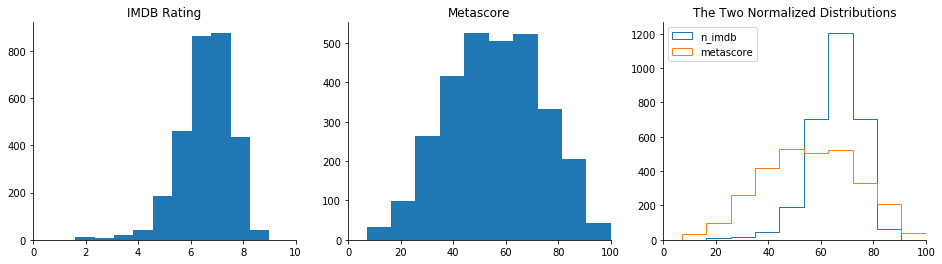

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1,3,figsize=(16,4))
ax1, ax2, ax3 = fig.axes

movie_ratings['imdb'].plot.hist(ax=ax1, xlim=(0,10), title='IMDB Rating')
movie_ratings['metascore'].plot.hist(ax=ax2, xlim=(0,100), title='Metascore')
movie_ratings[['n_imdb','metascore']].plot.hist(ax=ax3, xlim=(0,100), 
                                                title='The Two Normalized Distributions', histtype='step')
ax3.legend(loc='upper left')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('')